In [12]:
import Scene_Clustering_Representations as scr
import os
import sklearn.cluster as cluster
from sklearn.manifold import TSNE
import evaluationMetrics as em
import numpy as np
from sklearn.manifold import MDS
import matplotlib.pylab as plt

Directories to the subtitles and scene boundries/labels files

In [2]:
scenes_dir='/home/berhe/Desktop/LIMSI/TLP_thesis/Scenes/'
subtitle_dir='/home/berhe/Desktop/LIMSI/TLP_thesis/subtitles/'

subtitleFiles=[]
for fl in os.listdir(subtitle_dir):
    if '.en.srt' in fl:
       subtitleFiles.append(fl)

scenesegementedFiles=[]
for fl in os.listdir(scenes_dir):
    if 'Episode' in fl:
       scenesegementedFiles.append(fl)

subtitleFiles.sort()
scenesegementedFiles.sort()

Get all texts of  scenes from all the episodes

In [3]:
scene_textsA=[]
scene_lblsA=[]
startA=[]
endA=[]
for i in range(len(scenesegementedFiles)):
    scene_texts,scene_lbls ,start,end=scr.sceneTexts(scenes_dir+scenesegementedFiles[i],subtitle_dir+subtitleFiles[i])
    scene_textsA=scene_textsA+scene_texts
    scene_lblsA=scene_lblsA+scene_lbls
    startA=startA+start
    endA=endA+end

In [15]:
scene_texts,scene_lbls ,start,end=scr.sceneTexts(scenes_dir+scenesegementedFiles[0],subtitle_dir+subtitleFiles[0])

In [33]:
len(scene_textsA),len(scene_lblsA)#total number of scenes in 9 episodes of GoT

(274, 274)

In [17]:
tfidf_vector,terms=scr.tfidf_Representation(scene_textsA)

In [18]:
tfidf_vector.shape

(274, 3971)

In [10]:
import matplotlib.pyplot as plt

In [19]:
tsne_init = 'pca'  # could also be 'random'
tsne_perplexity = 10.0
tsne_early_exaggeration = 4.0
tsne_learning_rate = 1000
random_state = 1
model_pca = TSNE(n_components=2, random_state=random_state, init=tsne_init, perplexity=tsne_perplexity,
         early_exaggeration=tsne_early_exaggeration, learning_rate=tsne_learning_rate)

transformed_vector = model_pca.fit_transform(tfidf_vector)

In [21]:
transformed_vector.shape

(274, 2)

tf_idf_clust=scr.plot_clusters(transformed_vector,cluster.MeanShift, (0.175,), {'cluster_all':False})

In [4]:
scene_lblsA = [w.replace('NA', '11') for w in scene_lblsA]

In [5]:
scene_lblsA=[int(i) for i in scene_lblsA]

In [6]:
scene_lblsA=np.array(scene_lblsA)

In [88]:
print('accuracy %f' %(em.adjusted_rand_score(scene_lblsA,tf_idf_clust)))
print('NMI %f' %(em.normalized_mutual_info_score(scene_lblsA,tf_idf_clust)))
print('Purity %f' %(em.purity_score(scene_lblsA,tf_idf_clust)))
print('recall %f' %(em.recall(scene_lblsA,tf_idf_clust,rType='micro')))
print('precision %f' %(em.precision(scene_lblsA,tf_idf_clust,rType='micro')))

accuracy 0.008944
NMI 0.541710
Purity 0.835766
recall 0.007299
precision 0.007299


Count Vector

In [7]:
dtm,vocab =scr.count_Vector(training_data=scene_textsA)
dist_eclud,cos_sim=scr.distance_Measures(dtm)

In [8]:
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)
pos_ecludian=mds.fit_transform(dist_eclud)
pos_cos=mds.fit_transform(cos_sim)

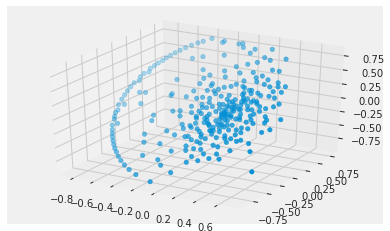

In [13]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pos_cos[:, 0], pos_cos[:, 1], pos_cos[:, 1])

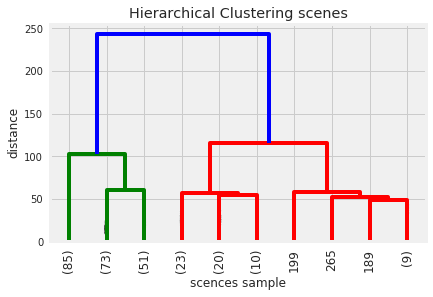

In [10]:
fcluster_res=scr.heirarchical_dendogram(dtm)

In [11]:
print('accuracy %f' %(em.adjusted_rand_score(scene_lblsA,fcluster_res)))
print('NMI %f' %(em.normalized_mutual_info_score(scene_lblsA,fcluster_res)))
print('Purity %f' %(em.purity_score(scene_lblsA,fcluster_res)))
print('recall %f' %(em.recall(scene_lblsA,fcluster_res,rType='micro')))
print('precision %f' %(em.precision(scene_lblsA,fcluster_res,rType='micro')))

accuracy 0.051993
NMI 0.091609
Purity 0.240876
recall 0.120438
precision 0.120438


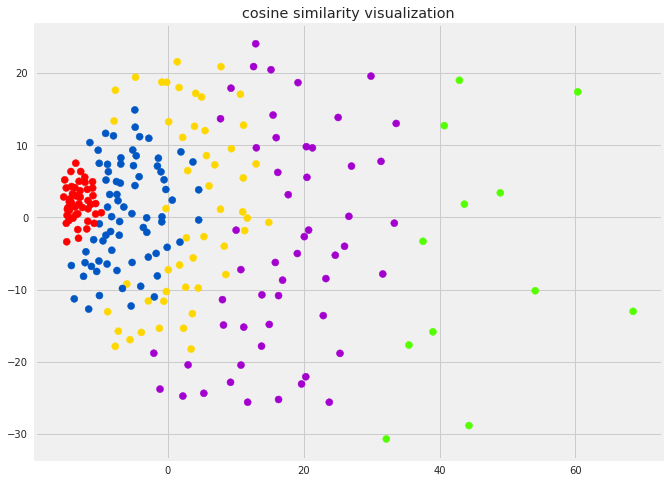

In [16]:
plt.figure(figsize=(10,8))
plt.title('cosine similarity visualization')
plt.scatter(pos_ecludian[:,0],pos_ecludian[:,1],c=fcluster_res,cmap='prism')
plt.show()